In [6]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# zerodha----paid data
# alphavantage----no NSE/BSE data
# quandl----no intraday data
# yfinance----working

# https://algotrading101.com/learn/google-finance-api-guide/
# https://github.com/ranaroussi/yfinance

In [7]:
!pip install autoscraper
!pip install python-dateutil
!pip install yfinance

In [8]:
#gettting list of NIFTY50 stocks
from autoscraper import AutoScraper

url='https://en.wikipedia.org/wiki/NIFTY_50'
want_list=['ADANIPORTS.NS']

#scrapping data from wikipedia
scraper=AutoScraper()
n50=scraper.build(url,want_list)

n50=n50[0:50]
print(n50)

['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']


In [9]:
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta

# we can only get last 60 days intraday day
# so, setting dates accordingly
end=str(date.today())
start=str(date.today()+relativedelta(months=-2,days=+2))

# appending symbols into a single string
symbols_str=""
for s in n50:
    symbols_str+=s+" "
    
# downloading last 60 days intraday(interval=2 mins) data of all symbols
data=yf.download(tickers=symbols_str,interval='2m',auto_adjust=True,start=start,end=end)

[*********************100%***********************]  50 of 50 completed


In [21]:
#checking nan values
close={}
for symbol in n50:
    close[symbol]=data['Close'][symbol].to_numpy()
    print(symbol,np.count_nonzero(np.isnan(close[symbol])))

ADANIPORTS.NS 564
ASIANPAINT.NS 564
AXISBANK.NS 0
BAJAJ-AUTO.NS 0
BAJFINANCE.NS 0
BAJAJFINSV.NS 0
BHARTIARTL.NS 0
BPCL.NS 564
BRITANNIA.NS 0
CIPLA.NS 0
COALINDIA.NS 564
DIVISLAB.NS 0
DRREDDY.NS 564
EICHERMOT.NS 564
GRASIM.NS 0
HCLTECH.NS 0
HDFC.NS 0
HDFCBANK.NS 564
HDFCLIFE.NS 564
HEROMOTOCO.NS 564
HINDALCO.NS 564
HINDUNILVR.NS 564
ICICIBANK.NS 564
INDUSINDBK.NS 564
INFY.NS 564
IOC.NS 564
ITC.NS 0
JSWSTEEL.NS 0
KOTAKBANK.NS 0
LT.NS 0
M&M.NS 0
MARUTI.NS 564
NESTLEIND.NS 564
NTPC.NS 0
ONGC.NS 564
POWERGRID.NS 0
RELIANCE.NS 0
SBIN.NS 0
SBILIFE.NS 0
SHREECEM.NS 1
SUNPHARMA.NS 564
TATAMOTORS.NS 564
TATASTEEL.NS 564
TCS.NS 0
TATACONSUM.NS 0
TECHM.NS 564
TITAN.NS 0
ULTRACEMCO.NS 564
UPL.NS 0
WIPRO.NS 0


In [22]:
#removing nan values
for symbol in n50:
    close[symbol]= [c for c in close[symbol] if not np.isnan(c)] 
    print(symbol,np.count_nonzero(np.isnan(close[symbol])))

ADANIPORTS.NS 0
ASIANPAINT.NS 0
AXISBANK.NS 0
BAJAJ-AUTO.NS 0
BAJFINANCE.NS 0
BAJAJFINSV.NS 0
BHARTIARTL.NS 0
BPCL.NS 0
BRITANNIA.NS 0
CIPLA.NS 0
COALINDIA.NS 0
DIVISLAB.NS 0
DRREDDY.NS 0
EICHERMOT.NS 0
GRASIM.NS 0
HCLTECH.NS 0
HDFC.NS 0
HDFCBANK.NS 0
HDFCLIFE.NS 0
HEROMOTOCO.NS 0
HINDALCO.NS 0
HINDUNILVR.NS 0
ICICIBANK.NS 0
INDUSINDBK.NS 0
INFY.NS 0
IOC.NS 0
ITC.NS 0
JSWSTEEL.NS 0
KOTAKBANK.NS 0
LT.NS 0
M&M.NS 0
MARUTI.NS 0
NESTLEIND.NS 0
NTPC.NS 0
ONGC.NS 0
POWERGRID.NS 0
RELIANCE.NS 0
SBIN.NS 0
SBILIFE.NS 0
SHREECEM.NS 0
SUNPHARMA.NS 0
TATAMOTORS.NS 0
TATASTEEL.NS 0
TCS.NS 0
TATACONSUM.NS 0
TECHM.NS 0
TITAN.NS 0
ULTRACEMCO.NS 0
UPL.NS 0
WIPRO.NS 0


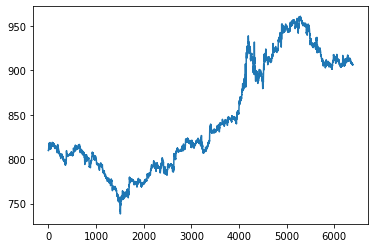

In [23]:
# plot of closing price of ITC stock
plt.plot(close['CIPLA.NS'])

In [24]:
# scaling data in range (0,1)
from sklearn.preprocessing import MinMaxScaler

scaler={}
for symbol,arr in close.items():
    # defining min max scaler for the symbol
    scaler[symbol]=MinMaxScaler(feature_range=(0,1))
    
    # scaling data
    arr=scaler[symbol].fit_transform(np.array(arr).reshape(-1, 1))
    close[symbol]=np.array(arr)
    

In [25]:
# generate sequence data to feed to RNN
# X:[a0 a1 a2 ...... a59] Y:[a60] seq_size=60

def generate_seq_data(data,input_size,output_size):
    #all elements except last index is X and last index is Y
    seq_data=[]
    for i in range(input_size+output_size-1,len(data)):
        seq_data.append(data[i-input_size-output_size+1:i+1])
        
    return np.array(seq_data,dtype="object").reshape(len(seq_data),input_size+output_size)

seq_data={}
input_size=100
output_size=10
for symbol in n50:
    seq_data[symbol]=generate_seq_data(close[symbol],input_size,output_size)


In [26]:
seq_data['ITC.NS'].shape

(6283, 110)

In [27]:
X_train,Y_train,X_test,Y_test=[],[],[],[]


for symbol in n50:
    sd=seq_data[symbol]
    
    # splitting in 80:20 ratio
    split_index=int(0.8*len(sd))
    train=sd[0:split_index]
    test=sd[split_index:]
    
    X_train.extend(train[:,:-output_size]) # all columns except last
    Y_train.extend(train[:,-output_size:]) # last column
    
    X_test.extend(test[:,:-output_size]) # all columns except last
    Y_test.extend(test[:,-output_size:]) # last column

    
X_train,Y_train,X_test,Y_test=np.array(X_train),np.array(Y_train),np.array(X_test),np.array(Y_test)


In [28]:
print(X_train.shape)
print(Y_train.shape)

(240926, 100)
(240926, 10)


In [29]:
print(X_test.shape)
print(Y_test.shape)

(60251, 100)
(60251, 10)


In [30]:
# from random import shuffle

# #shuffing train data
# ind_list=list(range(len(X_train)))
# shuffle(ind_list)
# X_train=X_train[ind_list,:]
# Y_train=Y_train[ind_list,:]

# #shuffing test data
# ind_list=list(range(len(X_test)))
# shuffle(ind_list)
# X_test=X_test[ind_list,:]
# Y_test=Y_test[ind_list,:]

In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1] ,1,1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1,1)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import tensorflow as tf

In [ ]:
# Stacked LSTM
# model=Sequential()
# model.add(LSTM(100,return_sequences=False,input_shape=X_train[0].shape))
# model.add(Dense(output_size))
# model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [56]:
#CNN

# width=X_train.shape[1]
# height=X_train.shape[2]
# batch_size=32
# epochs=50
# model=Sequential()
# #Conv Layer-1
# model.add(Conv2D(6,kernel_size=(5,1),input_shape=(width,height,1),data_format='channels_last',padding='same',activation='relu'))

# #Max Pool Layer-1
# model.add(MaxPooling2D(pool_size=(2,1),strides=(2,1)))

# #Conv Layer-2
# model.add(Conv2D(16,kernel_size=(5,1),activation='relu'))

# #Max Pool Layer-2
# model.add(MaxPooling2D(pool_size=(2,1),strides=(2,1)))

# #Conv Layer-3
# model.add(Conv2D(120,kernel_size=(5,1),activation='relu'))
# model.add(Flatten())

# #Fully Connected Layer-1
# model.add(Dense(10,activation='relu'))


# model.compile(optimizer='adam',loss='mean_squared_error')

In [57]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 1, 6)         36        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 1, 6)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 46, 1, 16)         496       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 1, 16)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 19, 1, 120)        9720      
_________________________________________________________________
flatten_4 (Flatten)          (None, 2280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [58]:
X_train=np.asarray(X_train).astype(np.float32)
Y_train=np.asarray(Y_train).astype(np.float32)
X_test=np.asarray(X_test).astype(np.float32)
Y_test=np.asarray(Y_test).astype(np.float32)

In [59]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=batch_size,verbose=1)

Epoch 1/50
7529/7529 [==============================] - 22s 3ms/step - loss: 0.0051 - val_loss: 4.0013e-04
Epoch 2/50
7529/7529 [==============================] - 22s 3ms/step - loss: 5.5515e-04 - val_loss: 3.6124e-04
Epoch 3/50
7529/7529 [==============================] - 22s 3ms/step - loss: 5.3095e-04 - val_loss: 3.7744e-04
Epoch 4/50
7529/7529 [==============================] - 22s 3ms/step - loss: 5.1236e-04 - val_loss: 3.7037e-04
Epoch 5/50
7529/7529 [==============================] - 22s 3ms/step - loss: 5.1945e-04 - val_loss: 3.7580e-04
Epoch 6/50
7529/7529 [==============================] - 22s 3ms/step - loss: 5.0466e-04 - val_loss: 3.6980e-04
Epoch 7/50
7529/7529 [==============================] - 22s 3ms/step - loss: 5.0339e-04 - val_loss: 3.5329e-04
Epoch 8/50
7529/7529 [==============================] - 22s 3ms/step - loss: 5.0015e-04 - val_loss: 3.5726e-04
Epoch 9/50
7529/7529 [==============================] - 22s 3ms/step - loss: 5.0828e-04 - val_loss: 3.8253e-04
Epoch

In [60]:
pred=model.predict(X_test)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_test,pred))

0.018821575595683822

In [66]:
symbol='ONGC.NS'
stock=close[symbol]

iters=50
keep=10


new_cnt=iters*keep
old=stock[:-new_cnt].flatten()

for i in range(0,iters):
    seq=old[-input_size:]
    seq=seq.reshape(1,input_size,1,1)
    pred=np.array(model.predict(seq))[0]
    old=np.concatenate((old,pred[:keep]),axis=0)

print('prediction done!')

math.sqrt(mean_squared_error(stock[-new_cnt:],old[-new_cnt:]))

prediction done!


0.08285123124157585

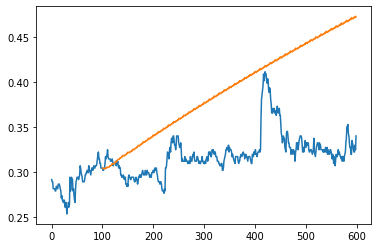

In [67]:
old[:-new_cnt]=np.nan
points=new_cnt+input_size

plt.plot(stock[-points:])
plt.plot(old[-points:])
plt.show()

In [ ]:
model.save('stox.h5')